# Exercises Matplotlib

- Execute the following cell to load the dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
store_date = pd.read_csv('walmart.csv', parse_dates = ['Date'])
store_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   State         6435 non-null   object        
 2   City          6435 non-null   object        
 3   Date          6435 non-null   datetime64[ns]
 4   Type          6435 non-null   object        
 5   IsHoliday     6435 non-null   bool          
 6   Weekly_Sales  6435 non-null   float64       
 7   Size          6435 non-null   float64       
 8   Temperature   6435 non-null   float64       
 9   Fuel_Price    6435 non-null   float64       
 10  MarkDown1     2280 non-null   float64       
 11  MarkDown2     1637 non-null   float64       
 12  MarkDown3     2046 non-null   float64       
 13  MarkDown4     1965 non-null   float64       
 14  MarkDown5     2295 non-null   float64       
 15  CPI           6435 non-null   float64 

### General
In this lesson, you will create multiple visualization. Make sure every one of them contains the following:
- Graph title
- X-axis title
- Y-axis title
- Legend (if applicable)

### 1 Turnover per week
- Execute the following cell to make the dataframe total_date.

In [34]:
total_date = store_date.groupby('Date')[['Weekly_Sales']].sum()
total_date.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


- Make a graph that shows the turnover per week (Weekly_Sales).
    - Hint: use plt.xticks() to rotate the dates of the x-axis (to improve readability).

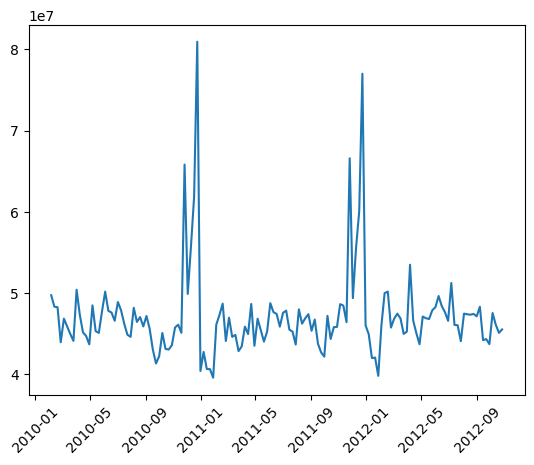

In [35]:
fig, ax = plt.subplots()
ax.plot(total_date.index, total_date['Weekly_Sales'])
plt.xticks(rotation=45)

plt.show()

### 2 Compare turnover per year
- Execute the following cell to make a dataframe for each year.

In [37]:
ten = store_date[store_date['Year'] == 2010].groupby('Week')[['Weekly_Sales', 'MD Total']].sum()
eleven = store_date[store_date['Year'] == 2011].groupby('Week')[['Weekly_Sales', 'MD Total']].sum()
twelve = store_date[store_date['Year'] == 2012].groupby('Week')[['Weekly_Sales', 'MD Total']].sum()
twelve.head()

,Weekly_Sales,MD Total
Week,,
1,44955421.95,1425400.48
2,42023078.48,678639.13
3,42080996.56,352638.95
4,39834974.67,177796.30
5,46085608.09,3307308.21


- Make a graph, containing 3 lineplots:
    - The weekly turnover of 2010
    - The weekly turnover of 2011
    - The weekly turnover of 2012
    
- For 2010 and 2012, we don't have all data available. From 2010, we only have the data from week 5 and onward and from 2012, we only have data up to week 43. Use ax.annotate to draw arrows in the graph to indicate from and until when we have all the data.

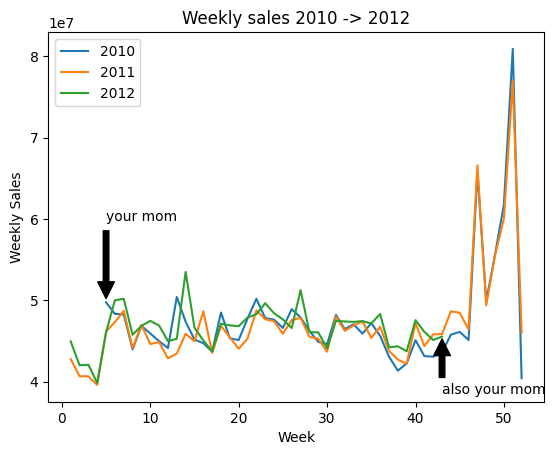

In [112]:
fig, ax = plt.subplots()

ax.plot(ten.index, ten['Weekly_Sales'], label='2010')
ax.plot(eleven.index, eleven['Weekly_Sales'], label='2011')
ax.plot(twelve.index, twelve['Weekly_Sales'], label='2012')

first_point = ten.iloc[0]
ax.annotate('your mom', xy=(first_point.name, first_point['Weekly_Sales']), xytext=(first_point.name, first_point['Weekly_Sales'] + 10000000),
            arrowprops=dict(facecolor='black', 
                            shrink=0.05),   )

last_point = twelve.iloc[-1]
ax.annotate('also your mom', xy=(last_point.name, last_point['Weekly_Sales']), xytext=(last_point.name, last_point['Weekly_Sales'] - 7000000),
            arrowprops=dict(facecolor='black', 
                            shrink=0.05),   )

ax.set_title('Weekly sales 2010 -> 2012')
ax.set_xlabel('Week')
ax.set_ylabel('Weekly Sales')
ax.legend()
plt.show()

### 3 Compare turnover and markdowns
- Execute the following cell to make the dataframe eleven49. This dataframe is needed, because markdowns (MD Total) begin at week 49 of 2011. You will use this dataframe to show the markdowns of 2011.
- Besides this dataframe, you will also need the earlier-used dataframes ten, eleven and twelve.

In [105]:
eleven49 = eleven.loc[49:]

- Make a visualizatoin that shows three graphs under each other:

     - In the upper graph, you show the turnover (Weekly_Sales) of 2010 in a blue line. The markdowns for 2010 are not available yet.  
     - In the middle graph, you show the turnover (Weekly_Sales) of 2011 with a blue line and the markdowns (MD Total) of 2011 with a red line. For the markdowns, you use eleven49. Make sure the color of the text of the y-axes corresponds with the colors of the lines.
     - In de lower graph, you show the turnover (Weekly_Sales) of 2012 in a blue line and the markdowns (MD Total) of 2012 in a red line. Make sure the color of the text of the y-axes corresponds with the colors of the lines.

For the graphs of 2011 and 2012, you will need to y-axes: one for the turnover and one for the markdowns. These axes have been made for you in advance.

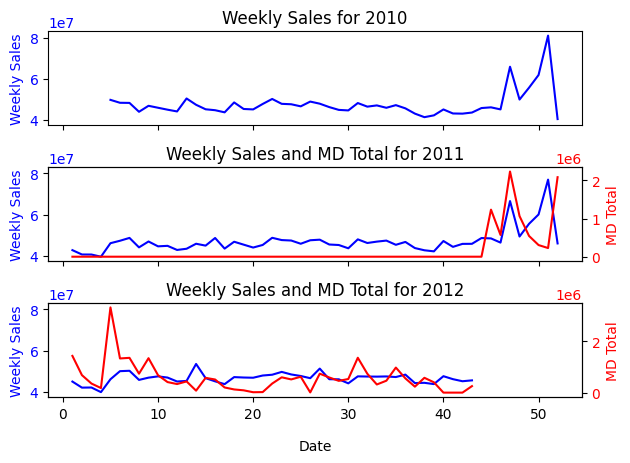

In [141]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=True)
#making the extra axes:
ax12 = ax[1].twinx()
ax22 = ax[2].twinx()

#2010
ax[0].plot(ten.index, ten['Weekly_Sales'], 'blue')

ax[0].set_ylabel('Weekly Sales', color='blue')
ax[0].tick_params(axis='y', labelcolor='blue')

#2011
ax[1].plot(eleven.index, eleven['Weekly_Sales'], 'blue')
ax12.plot(eleven.index, eleven['MD Total'], 'red')

ax[1].set_ylabel('Weekly Sales', color='blue')
ax12.set_ylabel('MD Total', color='red')
ax[1].tick_params(axis='y', labelcolor='blue')
ax12.tick_params(axis='y', labelcolor='red')

#2012
ax[2].plot(twelve.index, twelve['Weekly_Sales'], 'blue')
ax22.plot(twelve.index, twelve['MD Total'], 'red')

ax[2].set_ylabel('Weekly Sales', color='blue')
ax22.set_ylabel('MD Total', color='red')
ax[2].tick_params(axis='y', labelcolor='blue')
ax22.tick_params(axis='y', labelcolor='red')

#extra:
fig.text(0.5, 0, 'Date', ha='center')

ax[0].set_title('Weekly Sales for 2010')
ax[1].set_title('Weekly Sales and MD Total for 2011')
ax[2].set_title('Weekly Sales and MD Total for 2012')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#show
plt.show()
